In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


## Loading the datasets

In [391]:
titanic_data=pd.read_csv('train.csv')# loading the data

## Visualization of data

<AxesSubplot:xlabel='Survived', ylabel='count'>

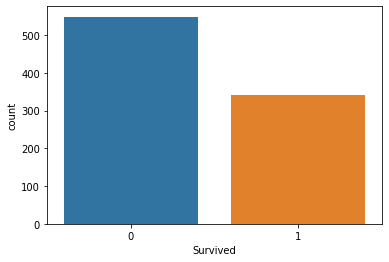

In [392]:
sns.countplot(x='Survived',data=titanic_data)


<AxesSubplot:>

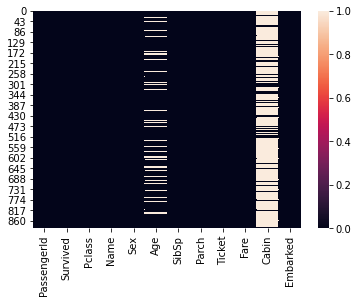

In [393]:
sns.heatmap(titanic_data.isna())

## Clearing the data

In [394]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [395]:
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100# checking the % of null value

19.865319865319865

In [396]:
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

In [397]:
#sns.displot(x='Age',data=titanic_data)

In [398]:
Age_mean=titanic_data['Age'].mean()

In [399]:
titanic_data['Age'].fillna(Age_mean,inplace=True)   # making Age value as non-Null

In [400]:
titanic_data['Age'].isna().sum()

0

In [401]:
titanic_data.drop('Cabin',axis=1,inplace=True) #dropping the Cabin column which has huge NUll value

In [402]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [403]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [404]:
titanic_data['Gender'] = gender

In [405]:
titanic_data.drop('Sex',axis=1,inplace=True)

In [406]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


In [407]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Gender           uint8
dtype: object

In [408]:
titanic_data.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)

In [409]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


## Splitting of data

In [410]:
X=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']

In [411]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

## Training the Model

In [412]:
lr=LogisticRegression()

In [413]:
lr.fit(X_train,y_train)

c:\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Testing the Model

In [414]:
prediction=lr.predict(X_test)

In [415]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       175
           1       0.78      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

